# Математическая статистика
## Практическое задание 0

В данном задании предлагается решить 4 простых задачи на использование функций библиотеки `numpy`. Хоть само задание и не относится к курсу статистики, оно является важным в условиях отсутствия курса по Питону. Решение этих задач поможет научить писать простой и понятный код, работающий при этом в десятки или даже в сотни раз быстрее. Нам же это облегчит процесс проверки.

**Правила:**

* Задание считается выполненным, если решено *не менее трех задач*.
* Успешное выполнение задание является допуском для выполнения следующих практических заданий.
* В случае неуспешного выполнения задания допускаются две попытки повторной сдачи. Мы будем стараться отвечать в течении трех дней.
* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 0"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `0.N.ipynb` и `0.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* В данном задании весь присылаемый код должен корректно работать на `Python 3.5`.


Во всех заданиях предполагается, что все аргументы функций, которые нужно реализовать, имеют тип `numpy.array` либо являются числами. Возвращать нужно также либо `numpy.array`, либо число. Кроме того, предполагается, что все аргументы корректны, и проверять их на корректность не нужно.

При реализации запрещается пользоваться любыми циклами, в том числе стандартными функциями языка, которые заменяют циклы. Можно использовать любые функции библиотек `numpy` или `scipy`, кроме функции `numpy.fromfunction` и декторатора `numpy.vectorize`.

In [13]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

**Задача 1.** Напишите функцию, реализующую матричное умножение. При вычислении разрешается создавать объекты размерности три. Запрещается пользоваться функциями, реализующими матричное умножение (`numpy.dot`, операция `@`, операция умножения в классе `numpy.matrix`). *Авторское решение занимает одну строчку.*

**Решение: ** По определению произведением двух матриц $A \in R_{n \times k}$ и $B \in R_{k \times m}$ называется матрица $C = A \times B \in R_{n \times m}$, определенная соотношением: $C_{i,j}=\sum_{l=1}^{k} A_{i, l} \cdot B_{l, j}$. 

Иными словами, любой элемент матрицы $C$ получен как скалярное произведение строки из $A$ и столбца из $B$.

Вспоминаем, что в numpy есть функция, которая считает внутреннее произведение: ```np.inner(a, b)```. Для векторов $a \in R_{1 \times n}$ и $b \in R_{1 \times n}$ результат ```np.inner(a, b)``` равен ```sum(a[:], b[:])```, т.е. скалярному произведению векторов $a$ и $b^T$.

Эта функция обобщается и на большие размерности и считает "sum product". Тогда для произведения матриц $A \in R_{n \times k}$ и $B \in R_{k \times m}$ можно использовать вызов ```np.inner(A, np.transpose(B))```.

In [14]:
def matrix_multiplication(A, B):    
    return np.inner(A, np.transpose(B))

Проверьте правильность реализации на случайных матрицах. Должен получится ноль.

In [15]:
A = sps.uniform.rvs(size=(10, 20))
B = sps.uniform.rvs(size=(20, 30))
np.abs(matrix_multiplication(A, B) - A @ B).sum()

0.0

А вот в таком стиле вы присылали бы нам свои работы, если не стали бы делать это задание.

In [16]:
def stupid_matrix_multiplication(A, B):
    C = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

Проверьте, насколько быстрее работает ваш код по сравнению с неэффективной реализацией `stupid_matrix_multiplication`. Эффективный код должен работать почти в 200 раз быстрее. Для примера посмотрите также, насколько быстрее работают встроенные `numpy`-функции.

In [17]:
A = sps.uniform.rvs(size=(400, 200))
B = sps.uniform.rvs(size=(200, 300))

%time C1 = matrix_multiplication(A, B)
%time C2 = A @ B  # python 3.5
%time C3 = np.matrix(A) * np.matrix(B)
%time C4 = stupid_matrix_multiplication(A, B)

CPU times: user 3.84 ms, sys: 756 µs, total: 4.59 ms
Wall time: 4.81 ms
CPU times: user 6.07 ms, sys: 552 µs, total: 6.62 ms
Wall time: 5.75 ms
CPU times: user 7.31 ms, sys: 707 µs, total: 8.02 ms
Wall time: 5.39 ms
CPU times: user 17.8 s, sys: 85.1 ms, total: 17.9 s
Wall time: 18 s


Ниже для примера приведена полная реализация функции. Ваc мы, конечно, не будем требовать проверять входные данные на корректность, но документации к функциям нужно писать.

In [18]:
def matrix_multiplication(A, B):
    '''Возвращает матрицу, которая является результатом
    матричного умножения матриц A и B.
    
    '''
    
    # Если A или B имеют другой тип, нужно выполнить преобразование типов
    A = np.array(A)
    B = np.array(B)
    
    # Проверка данных входных данных на корректность
    assert A.ndim == 2 and B.ndim == 2, 'Размер матриц не равен 2'
    assert A.shape[1] == B.shape[0], ('Матрицы размерностей '
                                      '{} и {} неперемножаемы'.format(A.shape,
                                                                      B.shape))
    
    C = np.inner(A, np.transpose(B))
    
    return C

**Задача 2.** Напишите функцию, которая по входной последовательности $X = (X_1, ..., X_n)$ строит последовательность $S = (S_1, ..., S_n)$, где $S_k = \frac{X_1 + ... + X_k}{k}$.  *Авторское решение занимает одну строчку.*

**Решение :** Будем использовать функции из библиотеки ```numpy```: ```np.cumsum``` и ```np.arange```.

Первая генерирует массив частичных сумм исходной последовательности.
Вторая же позволяет задать массив вида: ```[1, 2, ..., n]```. Тогда для получения требуемой последовательности достаточно результат вызова первой функции поделить на результат второй.

In [19]:
def cumavg(X):
    return np.cumsum(X) / np.arange(1, X.shape[0] + 1);

Постройте график зависимости $S_k$ от $k$. График должен быть в виде ломанной линии с достаточно крупными точками. Размер фигуры 15 на 5, сетка в виде пунктирной линии.

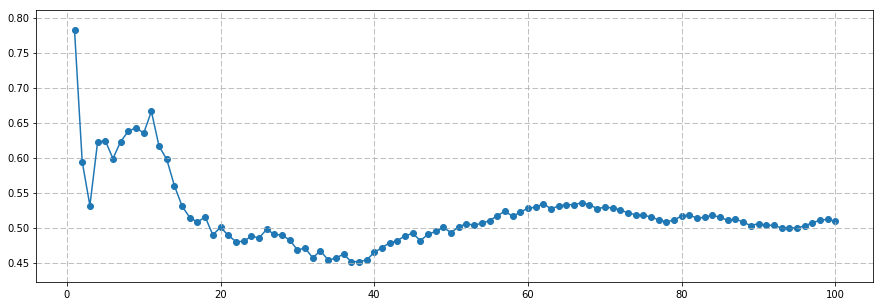

array([ 0.78211403,  0.68823932,  0.63602576,  0.63257663,  0.63092349,
        0.6255614 ,  0.62518851,  0.62676429,  0.62854845,  0.6291998 ,
        0.63254313,  0.63118917,  0.62860817,  0.62370007,  0.61750604,
        0.61106863,  0.60501316,  0.60004566,  0.59423645,  0.58956495,
        0.58478006,  0.58003486,  0.57570381,  0.5720532 ,  0.56858947,
        0.56585775,  0.56307286,  0.56043676,  0.55775213,  0.55477563,
        0.55207049,  0.54910147,  0.54661767,  0.54389292,  0.54139691,
        0.53920607,  0.53683678,  0.53459841,  0.5325306 ,  0.53083886,
        0.52939394,  0.52818342,  0.52709601,  0.52622339,  0.52546062,
        0.52450858,  0.52378738,  0.52318424,  0.52272157,  0.52212529,
        0.52172593,  0.52141715,  0.52108263,  0.52081263,  0.52061918,
        0.52055718,  0.52061107,  0.52053861,  0.52056355,  0.52069091,
        0.52082895,  0.52105001,  0.52114086,  0.52129967,  0.52147408,
        0.52165051,  0.52185836,  0.52201943,  0.52209812,  0.52

In [20]:
S = cumavg(sps.uniform.rvs(size=100))

plt.figure(figsize=(15, 5))
plt.scatter(np.arange(1, S.shape[0] + 1), S)
plt.grid(linestyle='--')
plt.plot(np.arange(1, S.shape[0] + 1), S)
plt.show()

cumavg(S)

Проверьте корректность работы реализации, а также ее эффективность. Эффективный код должен работать в 50 раз быстрее.

In [21]:
def stupid_cumavg(X):
    S = [0 for i in range(len(X))]
    for i in range(len(X)):
        S[i] = X[i] + S[i - 1]
    for i in range(len(X)):
        S[i] /= i + 1
    return S

X = sps.uniform.rvs(size=10 ** 7)

%time S1 = cumavg(X)
%time S2 = stupid_cumavg(X)

np.abs(S1 - S2).sum()

CPU times: user 74.5 ms, sys: 35.2 ms, total: 110 ms
Wall time: 110 ms
CPU times: user 6.27 s, sys: 195 ms, total: 6.46 s
Wall time: 6.5 s


0.0

**Задача 3.** Дана матрица $A = (a_{ij})$ размера $n \times m$. Вычислите величину $$\frac{1}{m} \sum_{j=1}^m \min_{i=1, ..., n} a_{ij},$$ то есть средний минимум по столбцам. *Авторское решение занимает одну строчку.*

**Решение: ** Опять-таки используем встроенные функции $-$ ```np.amin``` позволяет выбрать минимумы по заданной оси. Остальное - дело техники.

In [22]:
def avgmin(A):
    return np.mean(np.amin(A, axis=1))

Проверьте корректность работы реализации, а также ее эффективность. Эффективный код должен работать почти в 200 раз быстрее. Обратите внимание, что разность чисел может быть не равна нулю из-за ошибок округления, но должна иметь малый порядок.

In [23]:
def stupid_avgmin(A):
    N, M = len(A), len(A[0])
    min_col = [min([A[i][j] for i in range(N)]) for j in range(M)]
    return sum(min_col) / M

N, M = 5000, 10000
A = sps.uniform.rvs(size=(N, M))

%time S1 = avgmin(A)
%time S2 = stupid_avgmin(A)

print(np.abs(S1 - S2))

CPU times: user 42.6 ms, sys: 7.97 ms, total: 50.6 ms
Wall time: 51.9 ms
CPU times: user 17.9 s, sys: 110 ms, total: 18 s
Wall time: 18 s
0.000101470006499


**Задача 4.** Дан массив $X$. Требуется построить новый массив, в котором все четные элементы $X$ заменить на число $v$ (если оно не указано, то на ноль). Все нечетные элементы исходного массива нужно возвести в квадрат и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений.

** Решение: ** Используем магию библиотеки ```numpy```, а именно $-$ индексирование с условием.
Сначала меняем все чётные числа, а затем заменяем все нечётные на их квадраты, записанные в обратном порядке. Не забываем использовать копию.

In [24]:
def func4(X, v=0):
    X_copied = np.copy(X)
    X_copied[X_copied % 2 == 1] = (X_copied[X_copied % 2 == 1] ** 2)[::-1]
    X_copied[X_copied % 2 == 0] = v
    return X_copied

Проверьте корректность работы реализации, а также ее эффективность. Эффективный код должен работать в 20 раз быстрее.

In [25]:
def stupid_func4(X, v=0):
    odd = [elem ** 2 for elem in X if elem % 2]
    
    new_X = []
    j = len(odd) - 1
    for i in range(len(X)):
        if X[i] % 2:
            new_X.append(odd[j])
            j -= 1
        else:
            
            new_X.append(v)
    
    return new_X

X = sps.randint.rvs(size=10 ** 7, low=0, high=100)

%time A1 = func4(X)
%time A2 = stupid_func4(X)

np.abs(A1 - A2).sum()

CPU times: user 801 ms, sys: 99.3 ms, total: 900 ms
Wall time: 903 ms
CPU times: user 7.13 s, sys: 222 ms, total: 7.36 s
Wall time: 7.45 s


0

**Вопрос:** За счет чего достигается такая эффективность методов `numpy`?

**Ответ:** Большинство методов `numpy` и ` scipy` написаны на C и обёрнуты в Python. Этим достигается высокая эффективность.